In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/n/home12/binxuwang/Github/DiffusionOperatorSpectra")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from core.diffusion_basics_lib import * 
from core.diffusion_edm_lib import *
from core.diffusion_nn_lib import *
from core.toy_shape_dataset_lib import *

In [4]:
def get_device():
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device


### Train a toy diffusion model on 2d manifold data

  0%|          | 0/2000 [00:00<?, ?it/s]

step 0 loss 1.714


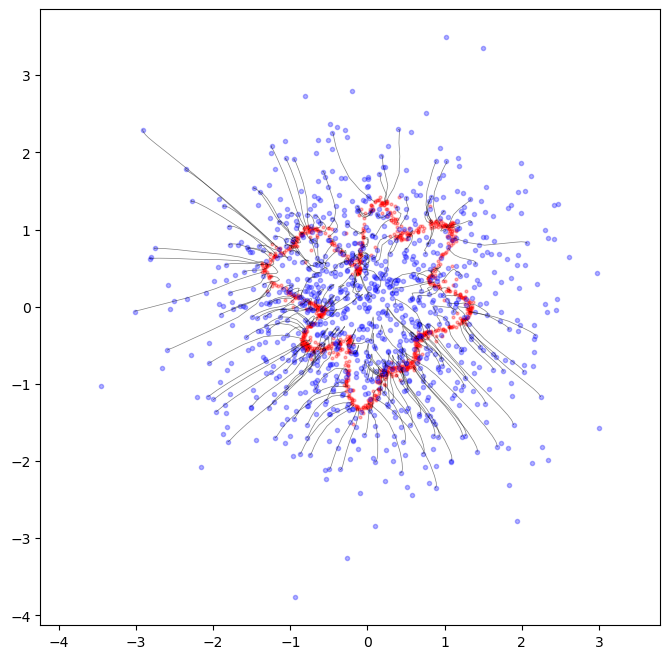

In [5]:
pnts, radius_fun, amplitudes, phases = generate_random_star_shape_torch(1000, num_modes=10)
pnts = pnts.float()
device = get_device()
model = UNetBlockStyleMLP_backbone(ndim=2, nlayers=5, nhidden=64, time_embed_dim=64,)
model_precd = EDMPrecondWrapper(model, sigma_data=0.5, sigma_min=0.002, sigma_max=80, rho=7.0)
edm_loss_fn = EDMLoss(P_mean=-1.2, P_std=1.2, sigma_data=0.5)
model_precd, loss_traj = train_score_model_custom_loss(pnts, model_precd, edm_loss_fn, 
                                    lr=0.001, nepochs=2000, batch_size=1024, device=device)

noise_init = torch.randn(1000, 2).to(device)
x_out, x_traj, x0hat_traj, t_steps = edm_sampler(model_precd, noise_init, 
                num_steps=20, sigma_min=0.002, sigma_max=80, rho=7, return_traj=True)

scaling = 1 / (t_steps ** 2 + 1).sqrt()
scaled_x_traj = (scaling[:, None, None] * x_traj).cpu()
plt.figure(figsize=[8,8])
plt.plot(scaled_x_traj[:, ::4, 0].numpy(), 
        scaled_x_traj[:, ::4, 1].numpy(), lw=0.5, color="k", alpha=0.5)
plt.scatter(scaled_x_traj[-1,:,0], scaled_x_traj[-1,:,1], c="red", s=4, marker='o', alpha=0.3)
plt.scatter(scaled_x_traj[ 0,:,0], scaled_x_traj[ 0,:,1], c="blue", s=9, marker='o', alpha=0.3)
plt.axis("equal")
plt.show()

  0%|          | 0/5000 [00:00<?, ?it/s]

step 0 loss 7.893
step 499 loss 2.217
step 999 loss 1.935
step 1499 loss 1.979
step 1999 loss 1.703
step 2499 loss 1.857
step 2999 loss 1.809
step 3499 loss 1.821
step 3999 loss 1.798
step 4499 loss 1.940
step 4999 loss 1.868


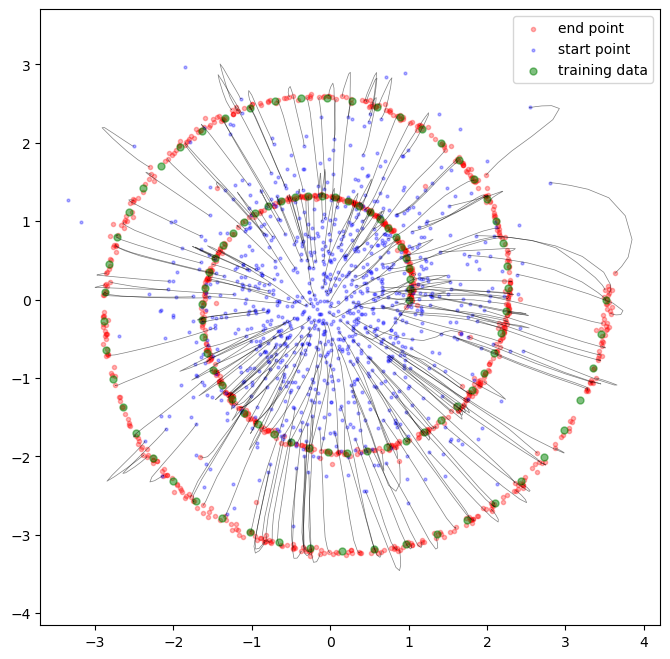

In [13]:
# pnts, radius_fun, amplitudes, phases = generate_random_star_shape_torch(1000, num_modes=10)
pnts = generate_spiral_samples_torch(100, )
pnts = pnts.float()
device = get_device()
model = UNetBlockStyleMLP_backbone(ndim=2, nlayers=5, nhidden=64, time_embed_dim=64,)
model_precd = EDMPrecondWrapper(model, sigma_data=0.5, sigma_min=0.002, sigma_max=80, rho=7.0)
edm_loss_fn = EDMLoss(P_mean=-1.2, P_std=1.2, sigma_data=0.5) # note sigma_date here can be changed.
model_precd, loss_traj = train_score_model_custom_loss(pnts, model_precd, edm_loss_fn, 
                                    lr=0.001, nepochs=5000, batch_size=1024, device=device)

noise_init = torch.randn(1000, 2).to(device)
x_out, x_traj, x0hat_traj, t_steps = edm_sampler(model_precd, noise_init, 
                num_steps=20, sigma_min=0.002, sigma_max=80, rho=7, return_traj=True)

scaling = 1 / (t_steps ** 2 + 1).sqrt()
scaled_x_traj = (scaling[:, None, None] * x_traj).cpu()
plt.figure(figsize=[8,8])
plt.plot(scaled_x_traj[:, ::4, 0].numpy(), 
        scaled_x_traj[:, ::4, 1].numpy(), lw=0.5, color="k", alpha=0.5)
plt.scatter(scaled_x_traj[-1,:,0], scaled_x_traj[-1,:,1], c="red", s=9, marker='o', alpha=0.3, label="end point")
plt.scatter(scaled_x_traj[ 0,:,0], scaled_x_traj[ 0,:,1], c="blue", s=4, marker='o', alpha=0.3, label="start point")
plt.scatter(pnts[:,0], pnts[:,1], c="green", s=25, marker='o', alpha=0.5, label="training data")
plt.axis("equal")
plt.legend()
plt.show()

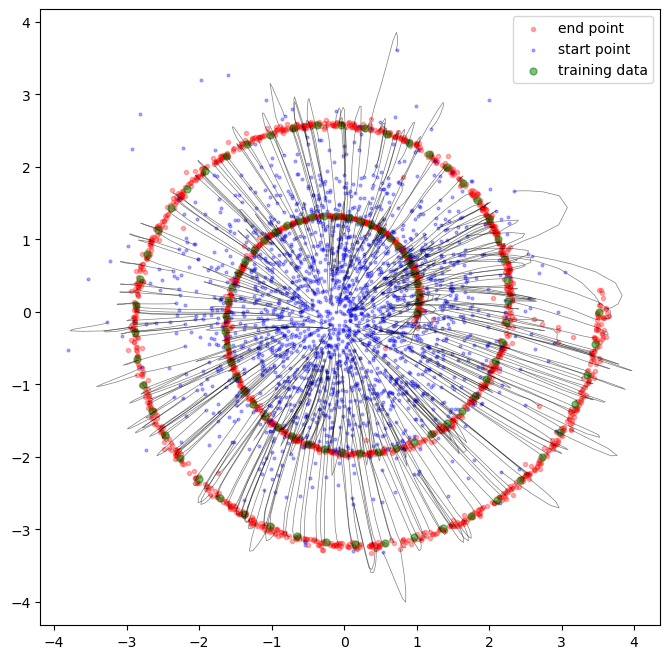

In [14]:
noise_init = torch.randn(2048, 2).to(device)
x_out, x_traj, x0hat_traj, t_steps = edm_sampler(model_precd, noise_init, 
                num_steps=20, sigma_min=0.002, sigma_max=80, rho=7, return_traj=True)

scaling = 1 / (t_steps ** 2 + 1).sqrt()
scaled_x_traj = (scaling[:, None, None] * x_traj).cpu()
plt.figure(figsize=[8,8])
plt.plot(scaled_x_traj[:, ::4, 0].numpy(), 
        scaled_x_traj[:, ::4, 1].numpy(), lw=0.5, color="k", alpha=0.5)
plt.scatter(scaled_x_traj[-1,:,0], scaled_x_traj[-1,:,1], c="red", s=9, marker='o', alpha=0.3, label="end point")
plt.scatter(scaled_x_traj[ 0,:,0], scaled_x_traj[ 0,:,1], c="blue", s=4, marker='o', alpha=0.3, label="start point")
plt.scatter(pnts[:,0], pnts[:,1], c="green", s=25, marker='o', alpha=0.5, label="training data")
plt.axis("equal")
plt.legend()
plt.show()

### Compute spectrum

In [51]:
from core.diffusion_operator_eigen_lib import compute_FPoperator_eigenmodes_from_score_func, \
    visualize_eigenmodes

(63001, 63001) Hopts is symmetric? False
First eigenvalue: (-2.0858925745234895+0j)
First eigenfunction shape: (251, 251)


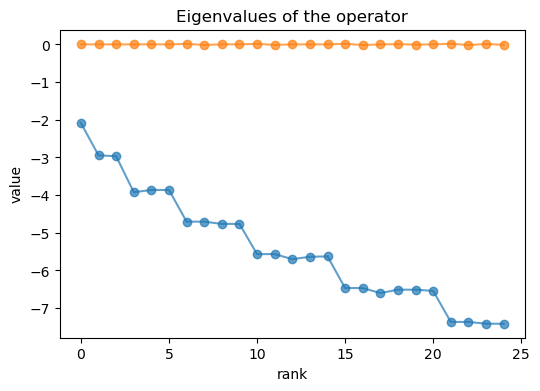

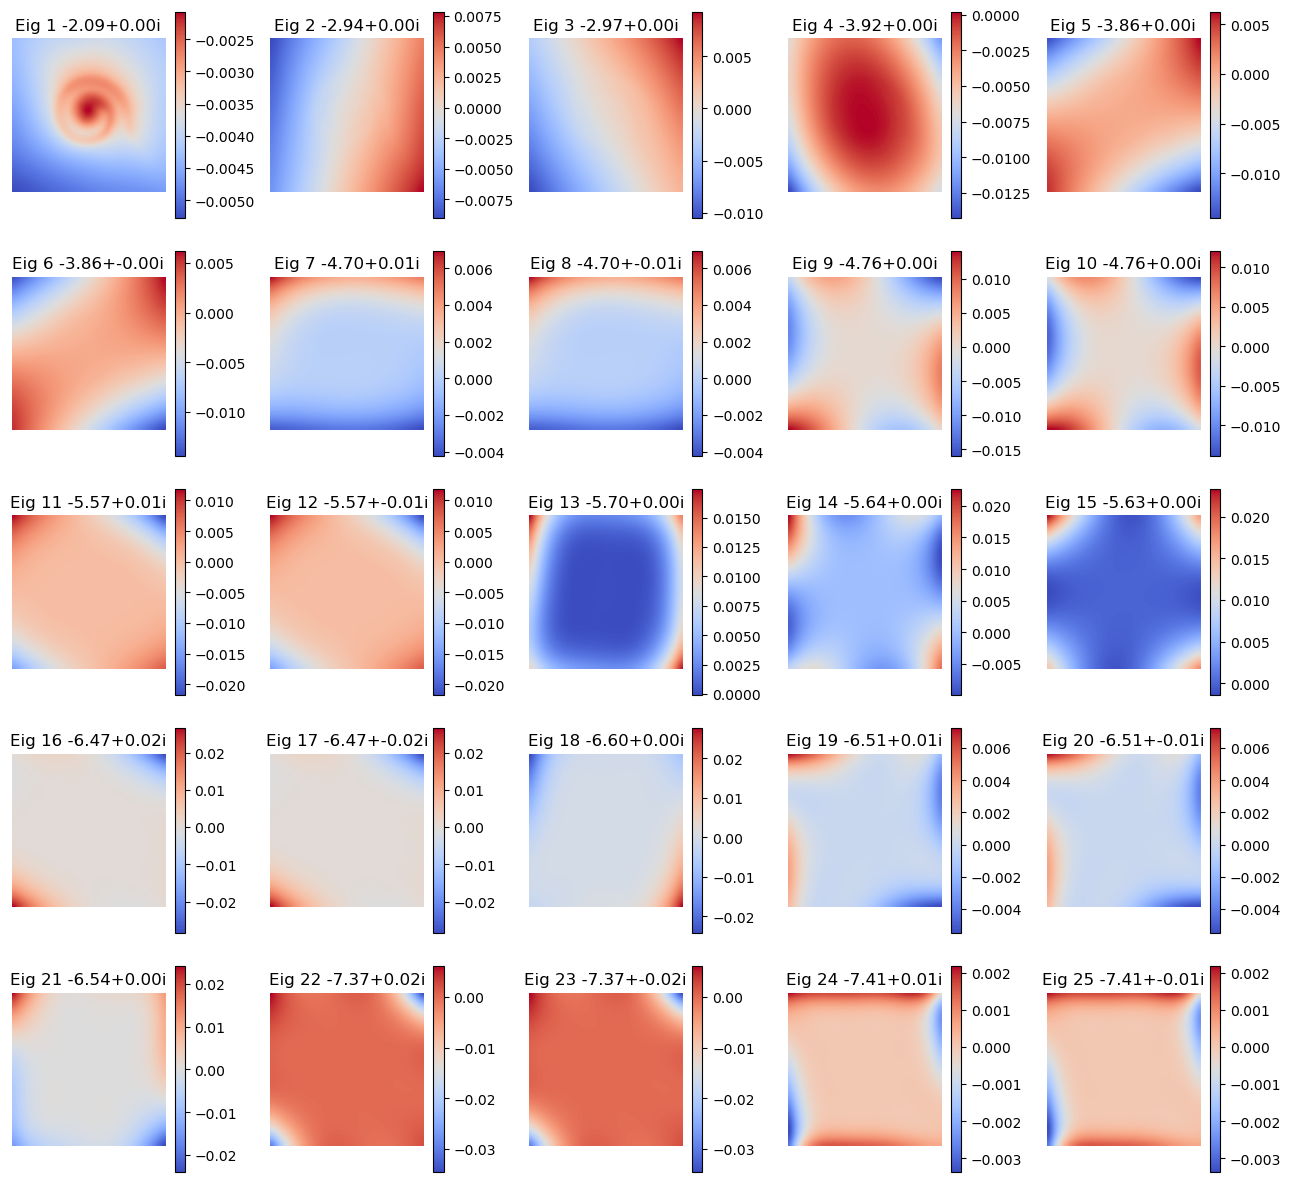

In [36]:
sigma = 0.05
scorefunc = lambda query: model_precd(query.to(device), sigma * torch.ones(query.shape[0], 1).to(device)).cpu().detach()
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc, num_eigenvalues=25,
            grid_size=251, xlim=(-6,6), ylim=(-6,6), boundary_condition="Neumann")
            #"Neumann")

(25921, 25921) Hopts is symmetric? False
First eigenvalue: (-2.086035261035556+0j)
First eigenfunction shape: (161, 161)


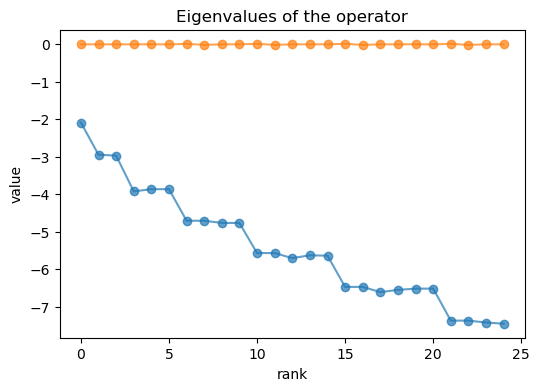

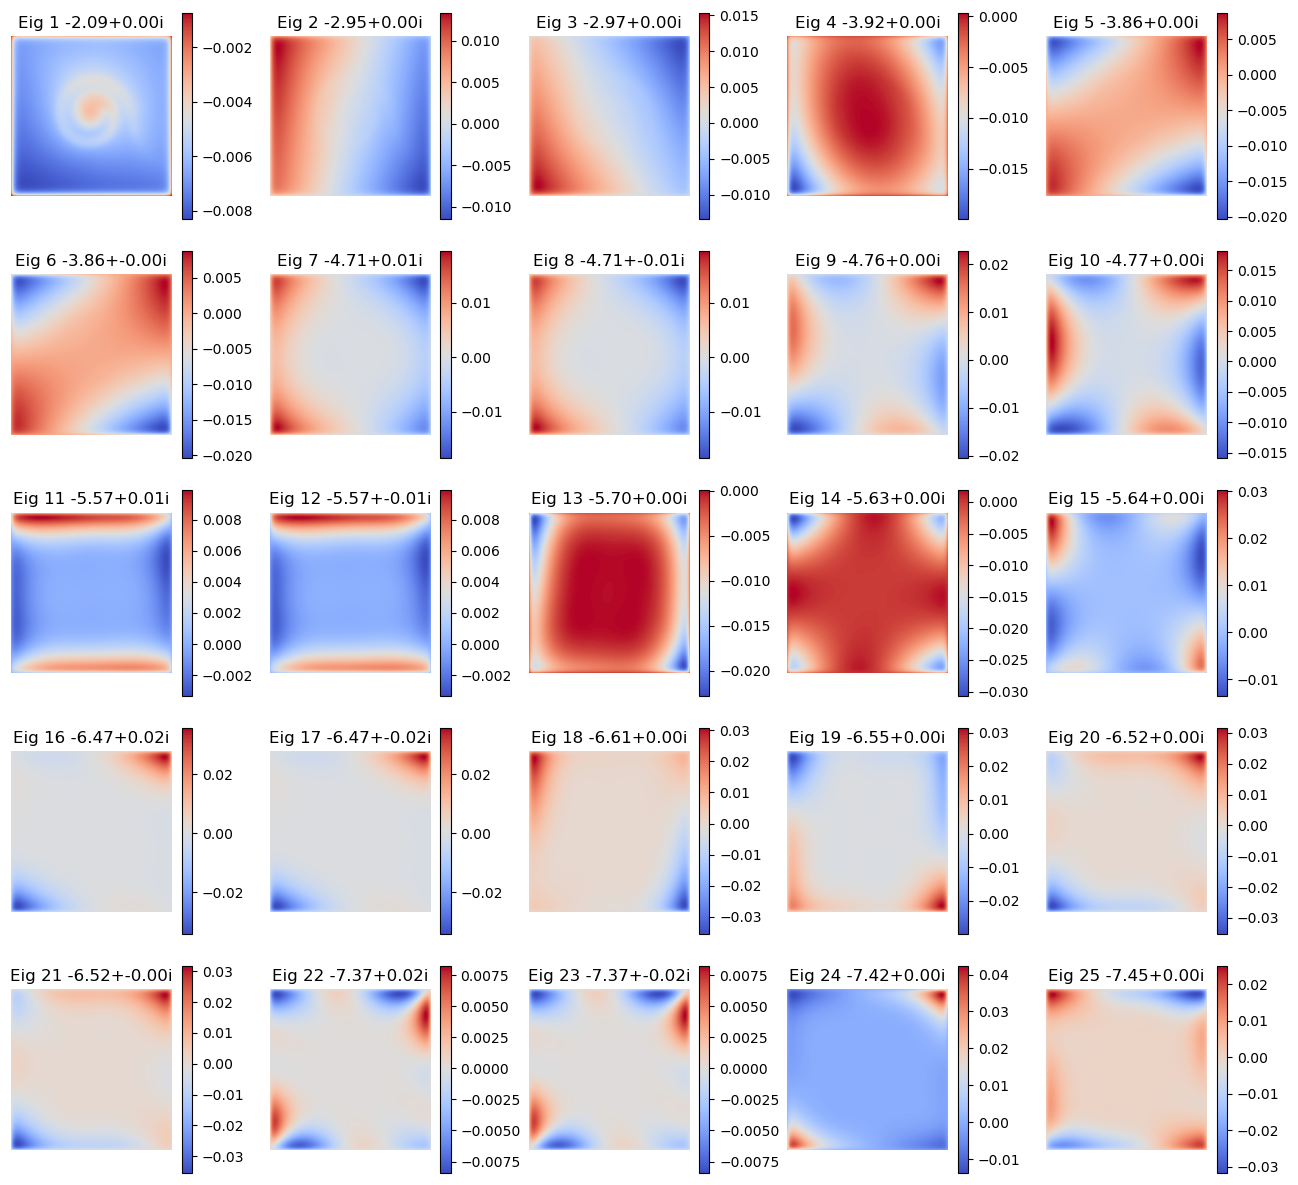

In [27]:
sigma = 0.05
scorefunc = lambda pnts: model_precd(pnts.to(device), sigma * torch.ones(pnts.shape[0], 1).to(device)).cpu().detach()
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc, num_eigenvalues=25,
            grid_size=161, xlim=(-6,6), ylim=(-6,6), )

(25921, 25921) Hopts is symmetric? False
First eigenvalue: (-2.086035261035556+0j)
First eigenfunction shape: (161, 161)


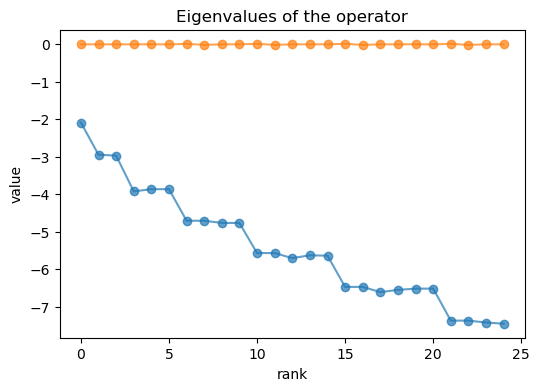

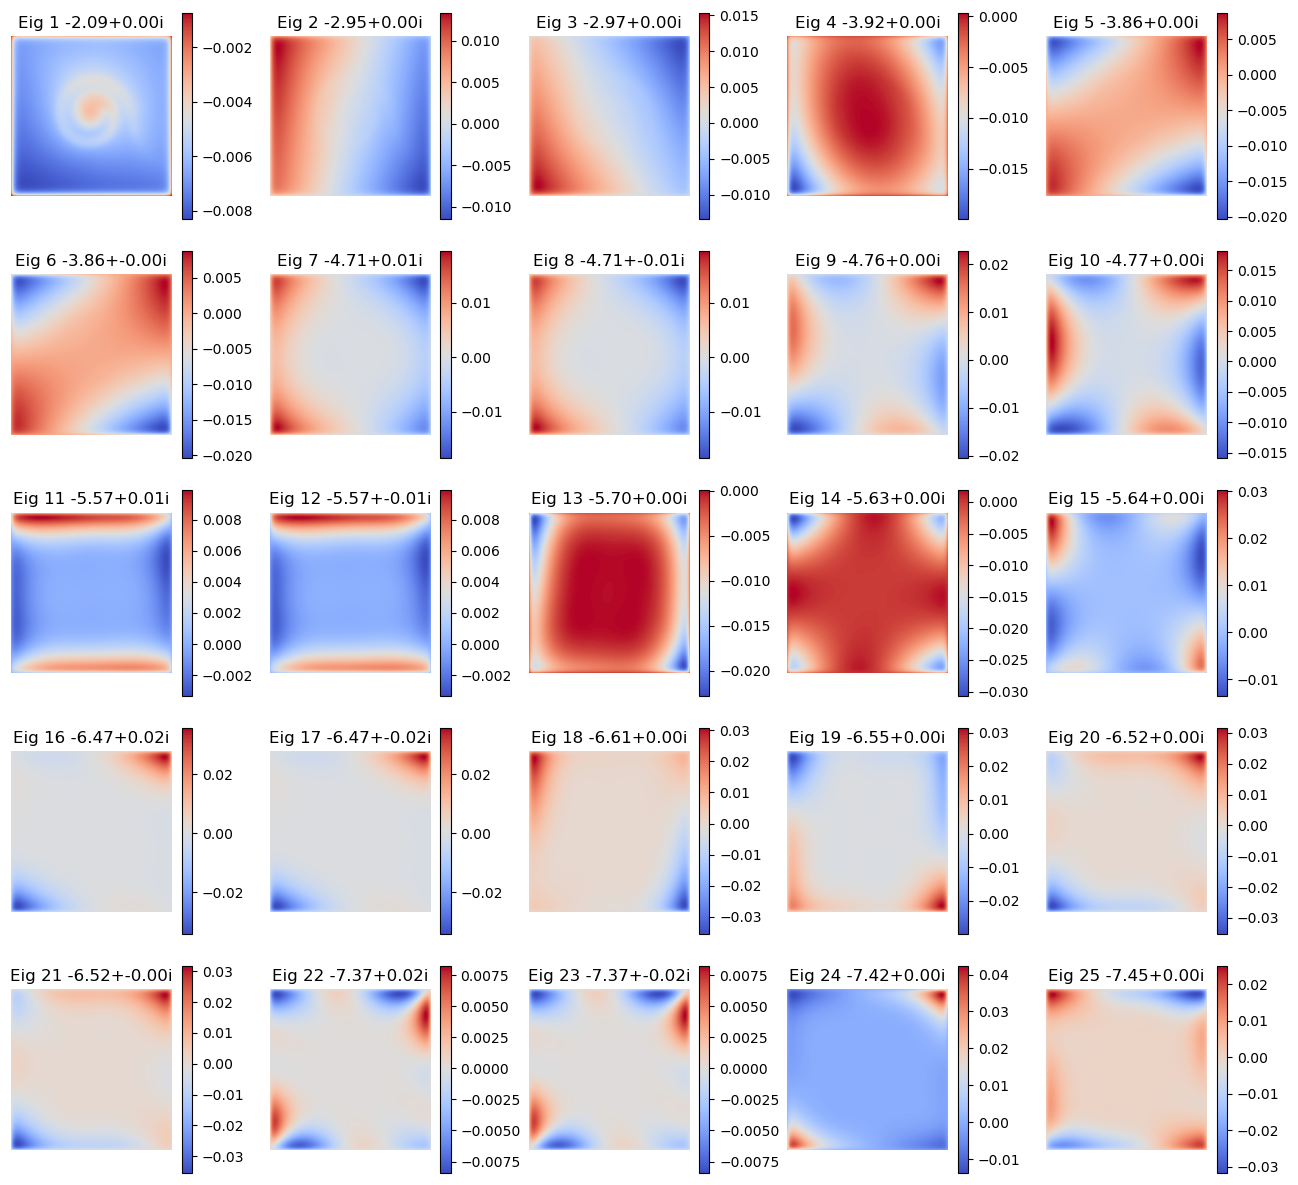

In [ ]:
sigma = 0.05
scorefunc = lambda pnts: model_precd(pnts.to(device), sigma * torch.ones(pnts.shape[0], 1).to(device)).cpu().detach()
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc, num_eigenvalues=25,
            grid_size=161, xlim=(-6,6), ylim=(-6,6), )

In [ ]:
from core.gmm_special_diffusion_lib import GMM_scores_torch
sigma = 0.1
scorefunc_exact = lambda query: GMM_scores_torch(pnts.to(device), sigma, query.to(device)).cpu().detach() 
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc_exact, num_eigenvalues=25,
            grid_size=161, xlim=(-6,6), ylim=(-6,6), )

(10201, 10201) Hopts is symmetric? False
First eigenvalue: (3.442168281725183+0j)
First eigenfunction shape: (101, 101)


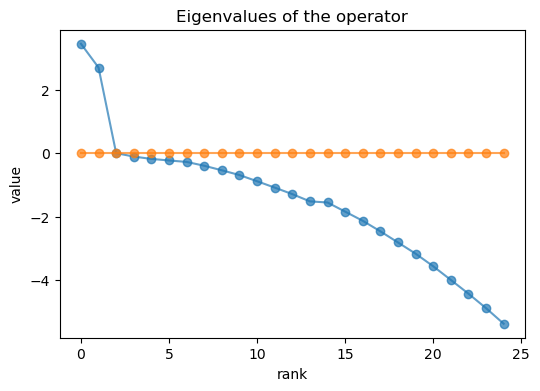

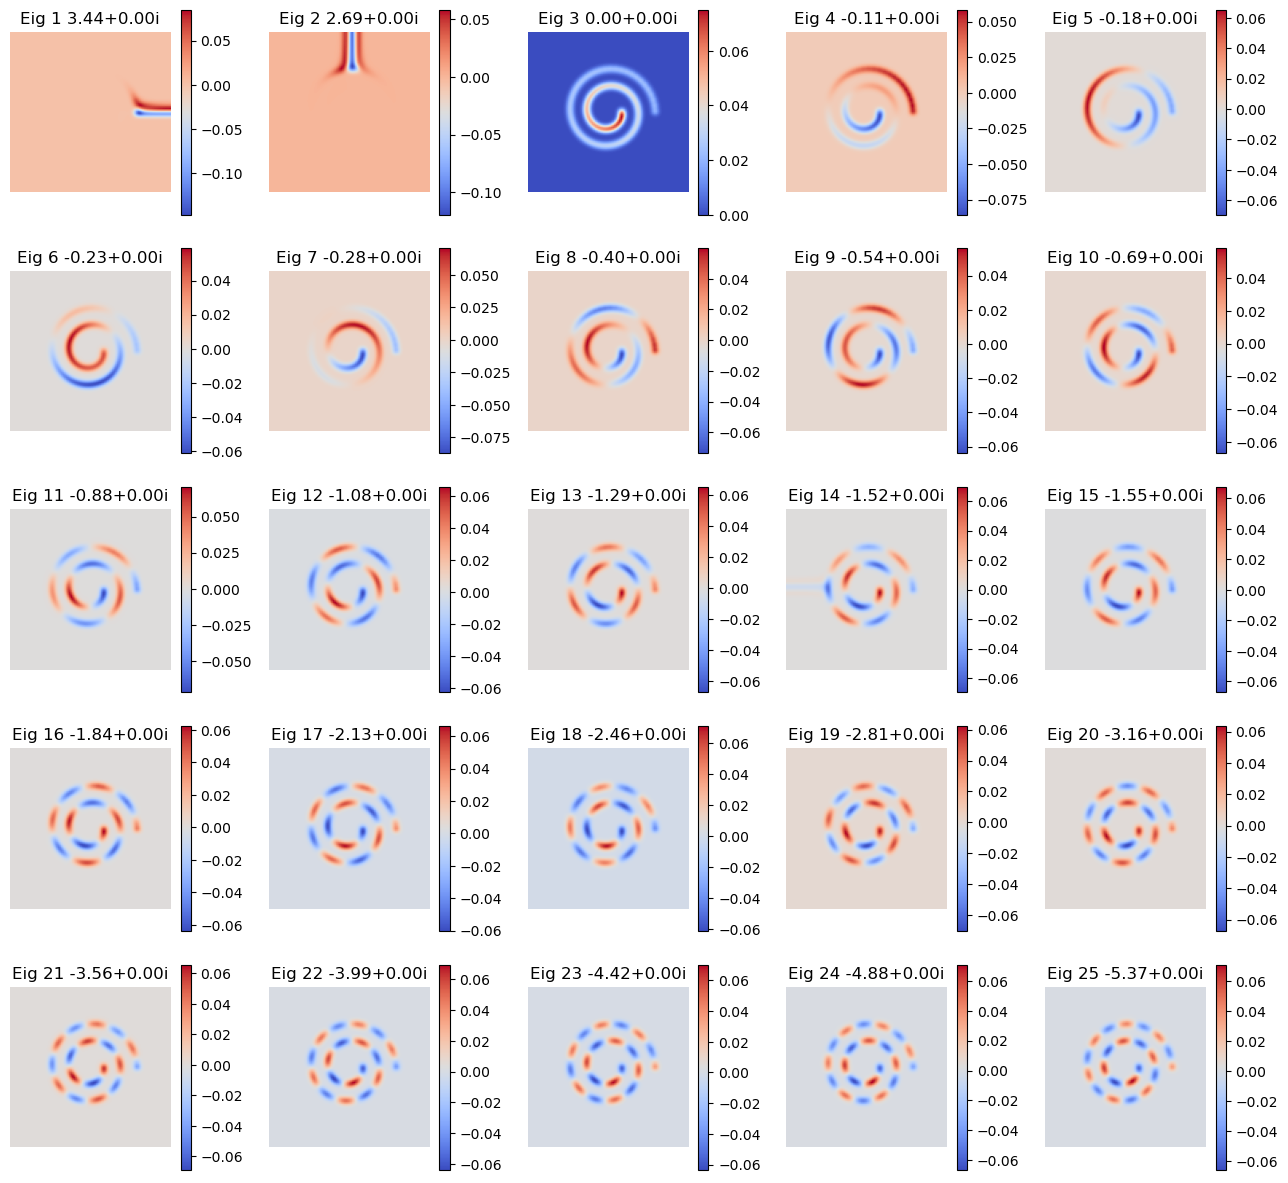

In [48]:
from core.gmm_special_diffusion_lib import GMM_scores_torch
sigma = 0.2
scorefunc_exact = lambda query: GMM_scores_torch(pnts.to(device), sigma, query.to(device)).cpu().detach() 
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc_exact, num_eigenvalues=25,
            grid_size=101, xlim=(-6,6), ylim=(-6,6), boundary_condition="Neumann")

(40401, 40401) Hopts is symmetric? False
First eigenvalue: (-5.262413425969033+0j)
First eigenfunction shape: (201, 201)


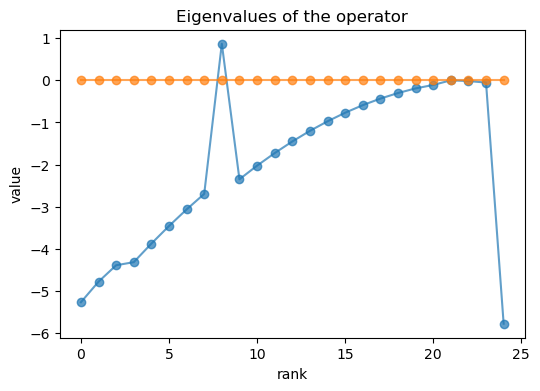

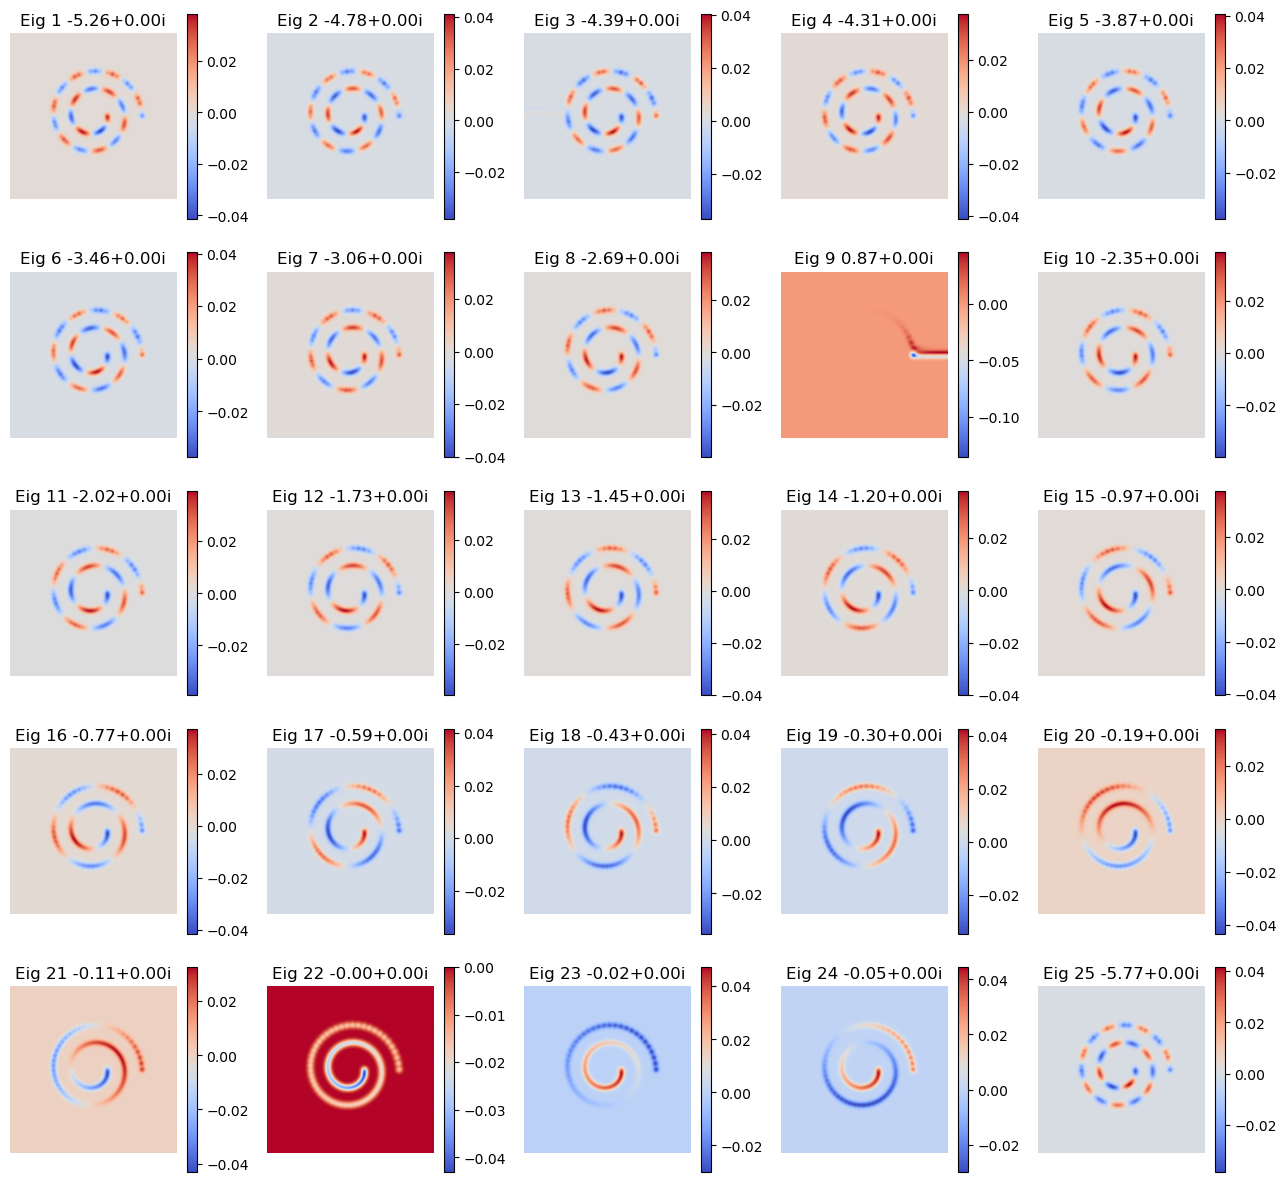

In [50]:
from core.gmm_special_diffusion_lib import GMM_scores_torch
sigma = 0.15
scorefunc_exact = lambda query: GMM_scores_torch(pnts.to(device), sigma, query.to(device)).cpu().detach() 
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc_exact, num_eigenvalues=25,
            grid_size=201, xlim=(-6,6), ylim=(-6,6), boundary_condition="Neumann")

(10201, 10201) Hopts is symmetric? False
First eigenvalue: (-414.58905984236367-63.62060303286234j)
First eigenfunction shape: (101, 101)


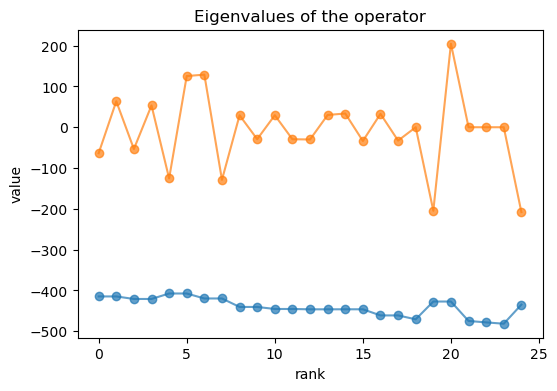

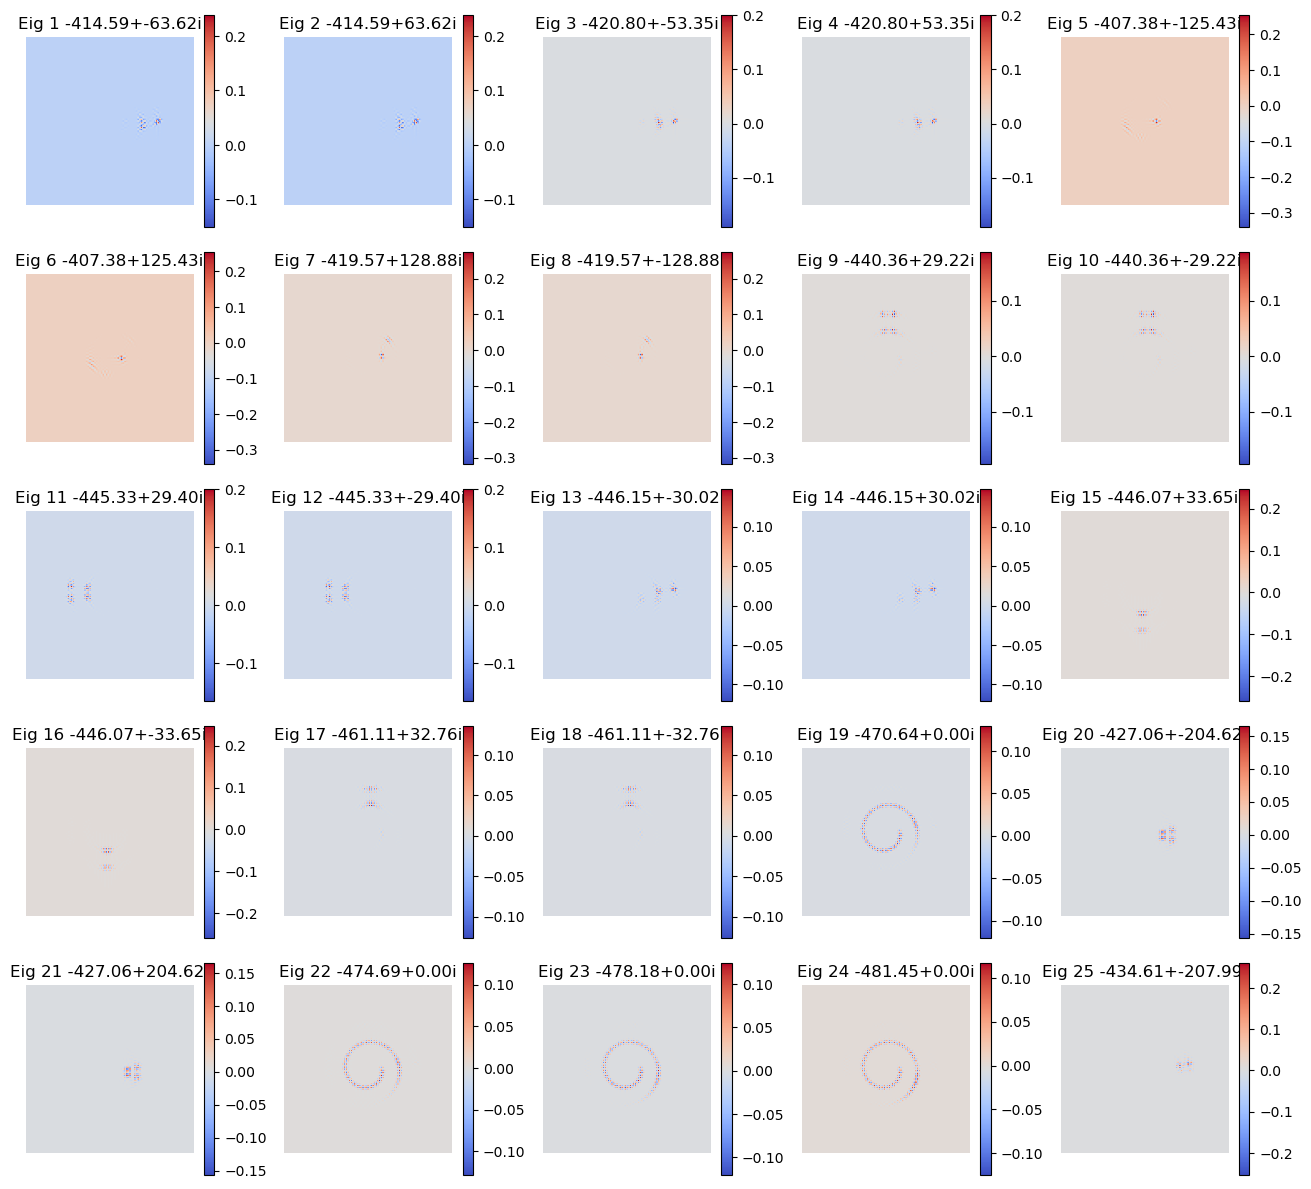

In [47]:
from core.gmm_special_diffusion_lib import GMM_scores_torch
sigma = 0.1
scorefunc_exact = lambda query: GMM_scores_torch(pnts.to(device), sigma, query.to(device)).cpu().detach() 
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc_exact, num_eigenvalues=25,
            grid_size=101, xlim=(-6,6), ylim=(-6,6), boundary_condition="Neumann")

(25921, 25921) Hopts is symmetric? False
First eigenvalue: (4.235390574745294+0j)
First eigenfunction shape: (161, 161)


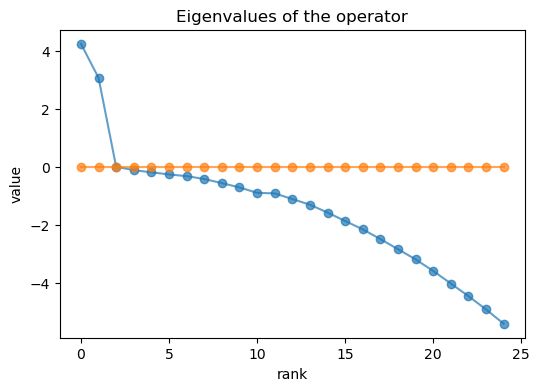

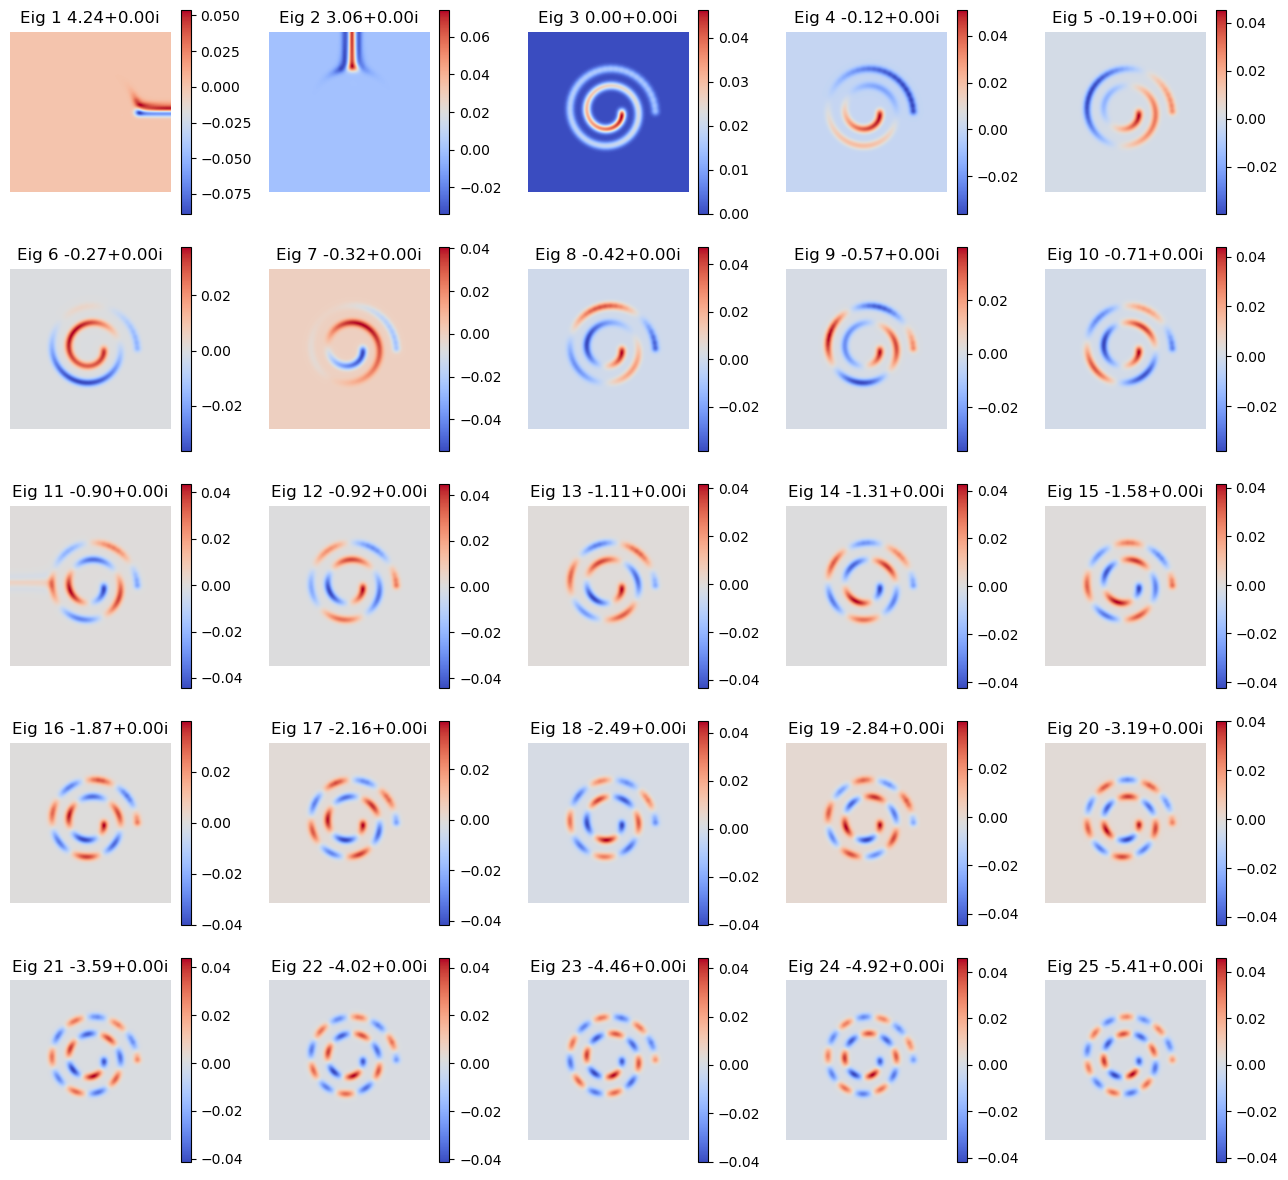

In [40]:
from core.gmm_special_diffusion_lib import GMM_scores_torch
sigma = 0.2
scorefunc_exact = lambda query: GMM_scores_torch(pnts.to(device), sigma, query.to(device)).cpu().detach() 
eigenvalues, eigenfunctions = compute_FPoperator_eigenmodes_from_score_func(
            scorefunc_exact, num_eigenvalues=25,
            grid_size=161, xlim=(-6,6), ylim=(-6,6), )